In [2]:
pip list


Package                   Version
------------------------- -----------
altair                    6.0.0
asttokens                 3.0.1
attrs                     25.4.0
blinker                   1.9.0
cachetools                6.2.4
certifi                   2025.11.12
charset-normalizer        3.4.4
click                     8.3.1
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.19
decorator                 5.2.1
executing                 2.2.1
fonttools                 4.61.1
gitdb                     4.0.12
GitPython                 3.1.46
greenlet                  3.3.0
idna                      3.11
ipykernel                 7.1.0
ipython                   9.8.0
ipython_pygments_lexers   1.1.1
jedi                      0.19.2
Jinja2                    3.1.6
joblib                    1.5.3
jsonschema                4.25.1
jsonschema-specifications 2025.9.1
jupyter_client   

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Yt = pd.read_csv(r"C:\Users\VICKY\Desktop\Guvi\projects\project 3\youtube_ad_revenue_dataset.csv")

%matplotlib inline

In [ ]:
Yt.head() 

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [5]:
Yt.shape

(122400, 12)

In [6]:
Yt.columns

Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd'],
      dtype='object')

In [7]:
Yt.dtypes

video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object

In [8]:
Yt.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [9]:
Yt.duplicated().sum()

np.int64(2400)

In [10]:
Yt.drop_duplicates(inplace=True)


In [11]:
Yt['likes'] = Yt['likes'].fillna(0)
Yt['comments'] = Yt['comments'].fillna(0)


## 🧠 Watch Time Imputation Strategy

Watch time plays a **critical role** in this dataset, as it shows a strong relationship with ad revenue.  
To handle missing values in `watch_time_minutes` without introducing bias, a **ratio-based imputation approach** was applied.

### 🔹 Approach Used
- Calculated a **watch ratio** using available `watch_time_minutes`, `views`, and `video_length_minutes`
- The ratio represents **average viewer retention**
- Used the **median watch ratio** to estimate missing watch time values

### 🔹 Why This Works
- Preserves realistic viewing behavior
- Avoids overestimating watch time
- Maintains consistency with real-world video analytics logic


In [12]:
Yt['watch_ratio'] = Yt['watch_time_minutes'] / (
    Yt['views'] * Yt['video_length_minutes']
)


In [13]:
median_ratio = Yt['watch_ratio'].median()


In [14]:
mask = Yt['watch_time_minutes'].isnull()

Yt.loc[mask, 'watch_time_minutes'] = (
    Yt.loc[mask, 'views'] *
    Yt.loc[mask, 'video_length_minutes'] *
    median_ratio
)


In [16]:
Yt.isnull().sum()


video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
dtype: int64

In [17]:
Yt.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,9999.832333,1044.605792,260.632350,37547.638756,16.017910,502291.970050,252.711361
std,99.918405,560.218383,139.884826,13348.909709,8.084928,288364.967705,61.954125
min,9521.000000,0.000000,0.000000,4677.345341,2.000142,1005.000000,126.590603
25%,9933.000000,578.000000,145.000000,26176.028599,9.005928,252641.500000,199.892158
50%,10000.000000,1054.000000,262.000000,37539.622192,16.009269,503633.500000,252.678607
75%,10067.000000,1524.000000,381.000000,48959.067208,23.026064,752386.250000,305.613497
max,10468.000000,2061.000000,515.000000,71532.634901,29.999799,999997.000000,382.768254


In [18]:
numeric_features = [feature for feature in Yt.columns if Yt[feature].dtype != 'O']
categorical_features = [feature for feature in Yt.columns if Yt[feature].dtype == 'O']

C:\Users\VICKY\AppData\Local\Temp\ipykernel_20412\3366530009.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=Yt[numeric_features[i]],shade=True, color='r')
C:\Users\VICKY\AppData\Local\Temp\ipykernel_20412\3366530009.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=Yt[numeric_features[i]],shade=True, color='r')
C:\Users\VICKY\AppData\Local\Temp\ipykernel_20412\3366530009.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=Yt[numeric_features[i]],shade=True, color='r')
C:\Users\VICKY\AppData\Local\Temp\ipykernel_20412\3366530009.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fil

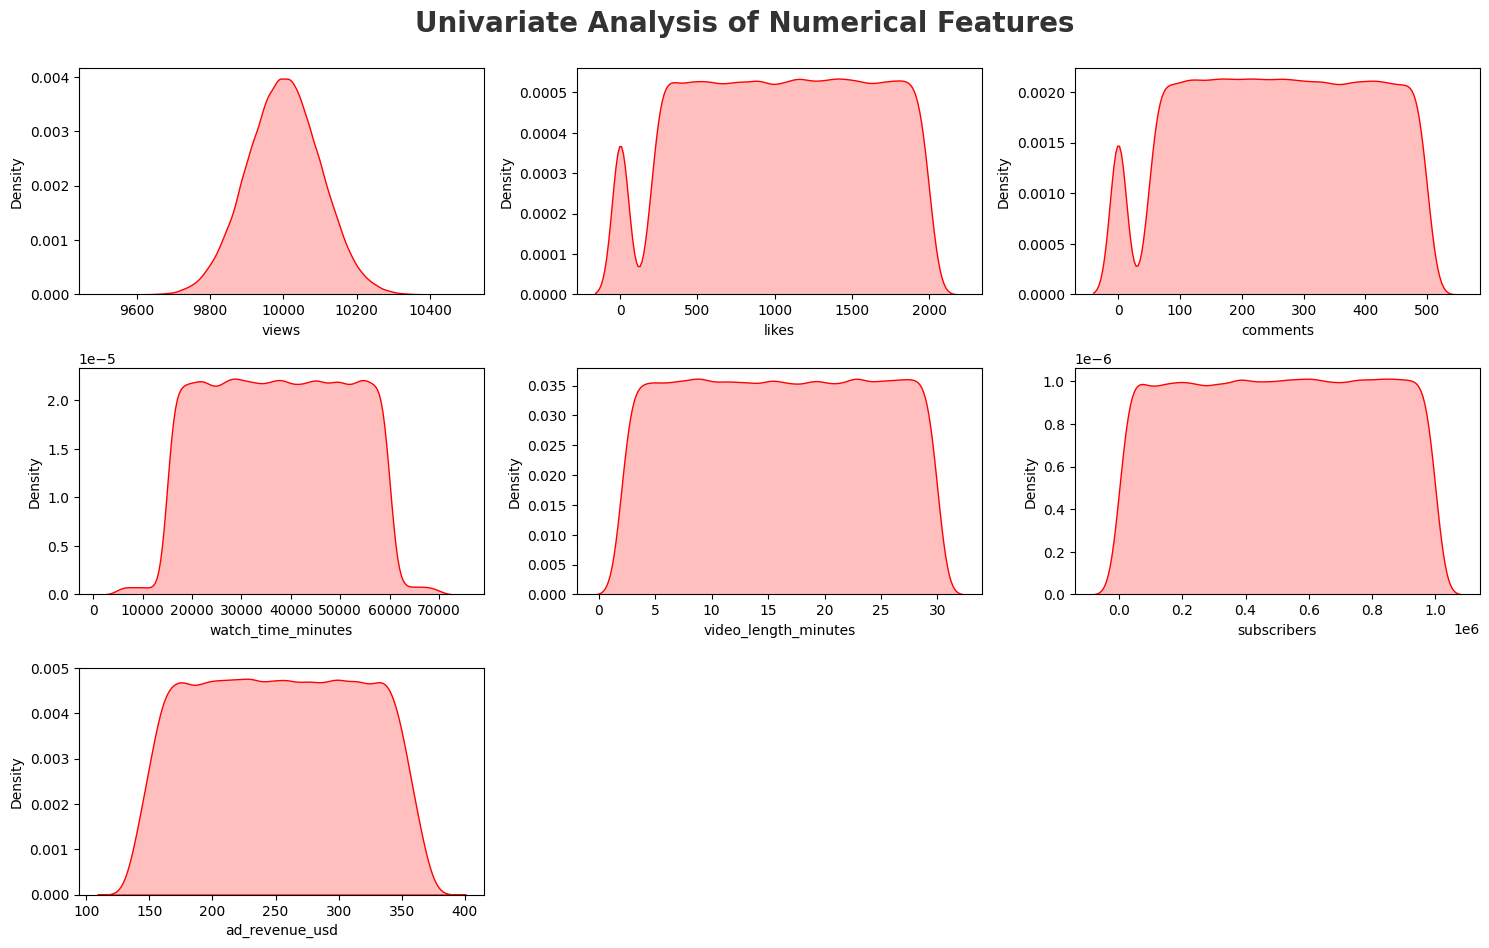

In [19]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=Yt[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## “Most engagement features show natural variability without extreme anomalies.
Subscriber count exhibits strong right skew and requires transformation, while revenue and engagement outliers represent real high-performing content and should be retained.”

## 🔍 Correlation Insight

The correlation heatmap shows that **watch time** has a very strong positive relationship with **ad revenue**,  
making it the most important predictor.

Other engagement metrics like **likes** and **views** show weak correlation, indicating that revenue is driven  
more by **viewer retention** than raw engagement.

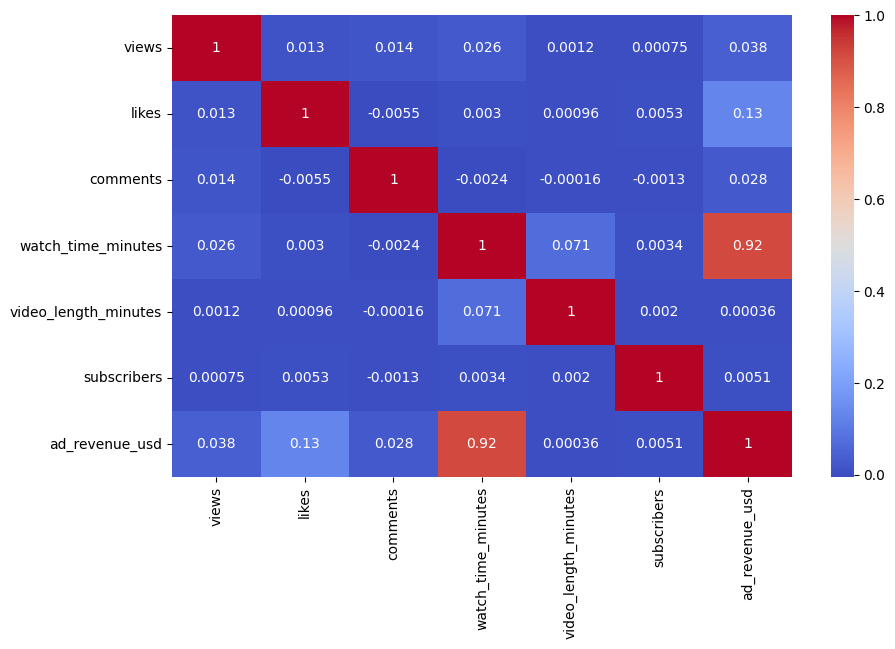

In [20]:

numeric_cols = Yt.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

### Engagement Feature Engineering

Total engagement was created by combining likes and comments to represent overall audience interaction.  
An engagement rate was then calculated by normalizing total engagement by views, allowing fair comparison across videos with different view counts.


In [21]:
Yt['total_engagement'] = Yt['likes'] + Yt['comments']
Yt['engagement_rate'] = Yt['total_engagement'] / (Yt['views'] + 1)


In [22]:
Yt.columns

Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd', 'total_engagement', 'engagement_rate'],
      dtype='object')

In [23]:
Yt['date'] = pd.to_datetime(Yt['date'])

Yt['year'] = Yt['date'].dt.year
Yt['month'] = Yt['date'].dt.month
Yt['Quarter'] = Yt['date'].dt.quarter


In [24]:
Yt.to_csv("C:\\Users\\VICKY\\Desktop\\Guvi\\projects\\project 3\\Cleaned_Yt.csv", index=False)

In [25]:
from sqlalchemy import create_engine

connection_string = (
    "mssql+pyodbc://VIGNESH\\SQLEXPRESS/YT?"
    "driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"
)

engine = create_engine(connection_string)

print("Engine created successfully!")


Engine created successfully!


In [26]:
import sqlalchemy as sa
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=VIGNESH\\SQLEXPRESS;"
    "DATABASE=YT;"
    "Trusted_Connection=yes;"
)

cursor = conn.cursor()
print("Connected to SQL Server!")
# Connection string for MSSQL
connection_string = (
    "mssql+pyodbc://VIGNESH\\SQLEXPRESS/YT?"
    "driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"
)

engine = create_engine(connection_string)

print("Engine created successfully!")

# Insert state dataframe
Yt.to_sql(
    "YouTubeData",
    con=engine,
    if_exists="append",
    index=False
)
print('connected to sql')

Connected to SQL Server!
Engine created successfully!
connected to sql


In [27]:
Yt = pd.get_dummies(
    Yt,
    columns=['category', 'device', 'country'],
    drop_first=True
)

In [29]:
Yt.dtypes

video_id                          object
date                      datetime64[ns]
views                              int64
likes                            float64
comments                         float64
watch_time_minutes               float64
video_length_minutes             float64
subscribers                        int64
ad_revenue_usd                   float64
total_engagement                 float64
engagement_rate                  float64
year                               int32
month                              int32
Quarter                            int32
category_Entertainment              bool
category_Gaming                     bool
category_Lifestyle                  bool
category_Music                      bool
category_Tech                       bool
device_Mobile                       bool
device_TV                           bool
device_Tablet                       bool
country_CA                          bool
country_DE                          bool
country_IN      

In [30]:
from sklearn.model_selection import train_test_split

X = Yt.drop(columns=['ad_revenue_usd', 'month','year','engagement_rate','video_id','date','Quarter'], axis=1)
y = Yt['ad_revenue_usd']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape        

((96000, 20), (24000, 20), (96000,), (24000,))

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)




,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
y_pred = model.predict(X_test)


In [35]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 8.27252922e-03  4.71549003e-03  4.53140782e-03  4.26127940e-03
 -4.99752090e-01  4.39681211e-07  9.24689784e-03  4.01126003e-02
  9.84306882e-02  6.04537794e-02 -2.08215699e-01  1.19841541e-01
  2.43327958e-02 -1.44076587e-01  2.75961752e-01 -3.97818379e-02
  5.13858383e-02 -1.03787848e-01  1.85446764e-01 -2.10461839e-01]


In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


R2: 0.8630126653215513
MAE: 10.142951298682048
RMSE: 22.909901367379067


In [37]:
model.score(X_train, y_train)
model.score(X_test, y_test)


0.8630126653215513

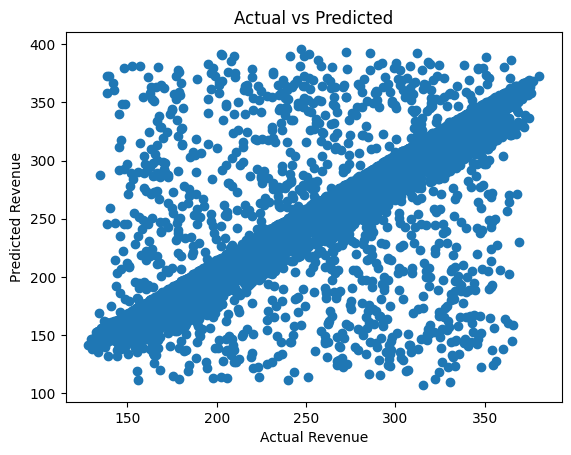

In [38]:


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted")
plt.show()


## “The actual vs predicted plot shows a strong diagonal alignment, indicating that the model predictions closely match actual values. 
The symmetric spread around the diagonal suggests unbiased errors and good generalization.”

# Let us try another model - Ridge Regression

In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)






,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [40]:
y_pred_ridge = ridge.predict(X_test_scaled)

In [41]:
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge Regression Performance")
print("R2:", r2_ridge)
print("MAE:", mae_ridge)
print("RMSE:", rmse_ridge)

Ridge Regression Performance
R2: 0.8630125943194888
MAE: 10.143269669304129
RMSE: 22.909907304606925


### "Ridge regression adds L2 regularization to penalize large coefficients, which helps reduce overfitting while retaining all features.”

In [42]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Lasso Regression Performance")
print("R2:", r2_lasso)
print("MAE:", mae_lasso)
print("RMSE:", rmse_lasso)


Lasso Regression Performance
R2: 0.863024390182383
MAE: 10.145028056865648
RMSE: 22.908920907565648


### “Lasso regression uses L1 regularization, which can eliminate less important features by shrinking their coefficients to zero”.

## “🏁Linear, Ridge, and Lasso produced similar results because the dataset has strong predictive features and low multicollinearity. 
Regularization did not significantly change coefficients, indicating that the baseline linear model is already well-generalized🚨.”

# 😎Let us try Random Forest and gradient boosting models to see if we can improve performance.

In [43]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Performance")
print("R2:", r2_rf)
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)


Random Forest Performance
R2: 0.9318827562509944
MAE: 5.157621591173921
RMSE: 16.155170462325934


In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Gradient Boosting Performance")
print("R2:", r2_gbr)
print("MAE:", mae_gbr)
print("RMSE:", rmse_gbr)


Gradient Boosting Performance
R2: 0.9273522183710493
MAE: 5.650163813484013
RMSE: 16.683769848750927


In [45]:


results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Random Forest',
        'Gradient Boosting'
    ],
    'R2': [
        r2,
        r2_ridge,
        r2_lasso,
        r2_rf,
        r2_gbr
    ],
    'MAE': [
        mae,
        mae_ridge,
        mae_lasso,
        mae_rf,
        mae_gbr
    ],
    'RMSE': [
        rmse,
        rmse_ridge,
        rmse_lasso,
        rmse_rf,
        rmse_gbr
    ]
})

results


,Model,R2,MAE,RMSE
0,Linear Regression,0.863013,10.142951,22.909901
1,Ridge Regression,0.863013,10.143270,22.909907
2,Lasso Regression,0.863024,10.145028,22.908921
3,Random Forest,0.931883,5.157622,16.155170
4,Gradient Boosting,0.927352,5.650164,16.683770


## "Random Forest Regression was selected as the final model because it achieved the highest accuracy, lowest prediction error, and effectively captured non-linear patterns in viewer behavior and revenue generation."

In [46]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import joblib
joblib.dump(rf, "Random Forest.pkl")



['Random Forest.pkl']

## “The saved model is loaded using joblib for inference on new unseen data.”

In [55]:

model = joblib.load("Random Forest.pkl")



In [49]:
feature_columns = X.columns


In [50]:

joblib.dump(feature_columns, "model_features.pkl")


['model_features.pkl']

In [51]:
input_data = pd.DataFrame({
    'views': [12000],
    'likes': [800],
    'comments': [120],
    'watch_time_minutes': [320000],
    'video_length_minutes': [100],
    'subscribers': [500000],

    # category
    'category_Entertainment': [1],
    'category_Gaming': [0],
    'category_Lifestyle': [0],
    'category_Music': [0],
    'category_Tech': [0],

    # device
    'device_Mobile': [1],
    'device_TV': [0],
    'device_Tablet': [0],

    # country
    'country_US': [1],
    'country_IN': [0],
    'country_UK': [0],
    'country_CA': [0],
    'country_DE': [0]
})


In [52]:
model_features = joblib.load("model_features.pkl")

input_data = input_data.reindex(columns=model_features, fill_value=0)



In [53]:
predicted_revenue = model.predict(input_data)
print("Predicted Ad Revenue:", predicted_revenue[0])


Predicted Ad Revenue: 263.53701372745576


In [54]:
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
